# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2023
## Домашнее задание 2. Методы нахождения оценок. Бутстреп. Байесовская статистика
### Мягкий дедлайн --- 27 октября 23:59
### Жёсткий дедлайн --- 2 ноября 16:59

Выполняйте задания прямо в ноутбуке. Пожалуйста, не стирайте условия задач.

- Информация о выполнении и курсе в целом есть в чате https://t.me/+IHdLycZDD5g5MDQy.
- По вопросам об условиях задач, требованиям можно писать в чат или https://t.me/vitalii_kondratiuk .
- По организационным вопросам https://t.me/d_pavlov_p

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* собственно кодом,
* Перед ячейками с кодом в случае необходимости пишите, что Вы вычисляете, что ожидаете увидеть и как будете анализировать результат
* После каждого числа или графика пишите анализ: каков результат? Оправдал ли он ожидания? Какие особености Вы увидели? Откуда они взялись?
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов, если не оговорено иного.

Для красоты графиков можно (и приветствуется) вместо гистограммы использовать ядерную оценку плотности (kernel density estimator): https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

Загрузим необходимый для задачи 2 датасет. Если что-то пошло не так, то просто скачайте файл по ссылке вручную.

In [320]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

Downloading...
From: https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs
To: c:\Users\pinma\Downloads\Telegram Desktop\Weibull.csv

  0%|          | 0.00/17.9k [00:00<?, ?B/s]
100%|██████████| 17.9k/17.9k [00:00<?, ?B/s]


In [321]:
import pandas as pd
import numpy as np
from scipy import stats as sps

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

**Условие задания**: Великая Ордалия уже почти готова к путешествию, однако враги империи проникли в замок и уничтожили все формулы с оценками из Домашнего задания 1. Можно попытаться восстановить их по памяти, но не лучше ли взамен старых оценок изобрести новые? Помимо этого за две тысячи лет (прошедших с момента первой ордалии до наших дней) точечные оценки значительно устарели и уже не способны отражать реальную суть вещей, поэтому Вам будет предложено попробовать на практике два других подхода: интервальные оценки и байесовские оценки.

В этой практике Вам предложено реализовать несколько подходов к построению оценок и понять, когда какой подход применять.

**Дисклеймер**:
В задачах будет разбиение на пункты, но оцениваться задача будет **целиком**. Можете считать, что выполнение всех пунктов вместе с отсутствием замечаний по полноте анализа/эффективности кода/информативности графиков/т.д. приносит полный балл.

### Задача 1

Прочитайте ещё раз задачу 1 домашки 1. Вы сравнивали оценки исходя из визуальных свойств их графиков. Пришло время начать сравнивать оценки строго!

Напомним, что в задаче речь шла про оценки параметра $\theta$ распределения $U[0, \theta]$: $2\overline{X}$, $\frac{n+1}{n} X_{(n)}$, $(n+1)X_{(1)}$, $\overline{X} + X_{(n)}/ 2$ и $X_{(1)}+X_{(n)}$. Как и ранее, зафиксируем какое-то конкретное значение параметра, скажем, $\theta = 1$.

Постройте плотности для первых трёх оценок. Настойчиво просим предоставлять решение в виде теха, но если у вас лапки, то можете прикрепить фото с хорошо разборчивым почерком.

Решение и ответ:

Для начала найдем чему равна функция распределения минимума: <br>
$F_{X_{(1)}}(x) = P(X_{(1)} \leq x) = 1 - P(X_{(1)} > x) = 1 - P(X_1 > x, X_2 > x, ..., X_n > x) = 1 - (1 - F_{X_{1}}(x))^n$ <br>
Теперь посчитаем плотность минимума: <br>
$p_{X_{(1)}}(x) = F’_{X_{(1)}}(x) = n(1-F_{X_{1}}(x))^{n-1}p_{X_{1}}(x) = \frac{n(1-\frac{x}{\theta})^{n-1}}{\theta} I(x \in [0,\theta])$ <br>
Посчитаем аналогично для максимума: <br>
$F_{X_{(n)}}(x) = P(X_{(n)} \leq x) = P(X_1 \leq x, X_2 \leq x, ..., X_n \leq x) = F_{X_{1}}(x)^n$ <br>
$p_{X_{(n)}}(x) = F’_{X_{(n)}}(x) = nF_{X_{1}}(x)^{n-1}p_{X_{1}}(x) = n(\frac{x^{n-1}}{\theta^n}) I(x \in [0,\theta])$

Для квадратичной функции потерь посчитайте аналитически (для первых трёх оценок) и численно (для каждой оценки) риск для выборки из $N$ элементов. Начните с $N=1000$ и уменьшите его, если вычисления будут неподъемными. Для численного вычисления интеграла можно использовать scipy.integrate.quad или метод Монте-Карло.

Посчитаем аналитически для $2\overline{X}$: <br>
$E(2\overline{X} - \theta)^2 = 4E(\overline{X}^2) - 4\theta E(\overline{X}) + \theta^2 = 4(\frac{\theta^2}{12n} + \frac{\theta^2}{4})  - 4\theta E(X_1)+ \theta^2 = 4(\frac{\theta^2}{12n} + \frac{\theta^2}{4}) -\theta^2 =  \frac{\theta^2}{3n}$ <br>
Посчитаем для $\frac{n+1}{n}X_{(n)}$ <br>
$E(\frac{n+1}{n}X_{(n)} - \theta)^2 = (\frac{n+1}{n})^2E(X_{(n)}^2) - 2(\frac{n+1}{n})E(X_{(n)}\theta) + \theta^2$ <br>
$EX_{(n)} = \int_{0}^{\theta}n(\frac{x^{n-1}}{\theta^n}) x dx = \frac{n\theta}{(n+1)}$ <br>
$EX_{(n)}^2 = \int_{0}^{\theta}n(\frac{x^{n-1}}{\theta^n}) x^2 dx = \frac{n\theta^2}{(n+2)}$ <br>
$E(\frac{n+1}{n}X_{(n)} - \theta)^2 = \frac{(n+1)^2\theta^2}{n(n+2)} -\theta^2 = \frac{\theta^2}{n(n+2)}$ <br>
Посчитаем для $(n+1)X_{(1)}$ <br>
$E((n+1)X_{(1)} - \theta)^2 = (n+1)^2EX_{(1)}^2-2(n+1)\theta EX_{(1)}+\theta^2$ <br>
$EX_{(1)} = \int_{0}^{\theta}\frac{n(1-\frac{x}{\theta})^{n-1}}{\theta} x dx = \theta \int_{0}^{1} n(1-t)^{n-1} t dt = \theta n B(2,n) = \frac{\theta}{n+1}$ <br>
$EX_{(1)}^2 = \theta \int_{0}^{\theta}\frac{n(1-\frac{x}{\theta})^{n-1}}{\theta^2} x^2 dx = \theta^2 \int_{0}^{1} n(1-t)^{n-1} t^2 dt = \theta^2 n B(3,n) = \frac{2\theta^2}{(n+1)(n+2)}$ <br>
$E((n+1)X_{(1)} - \theta)^2 = \frac{2\theta^2(n+1)}{n+2} - \theta^2 = \frac{n\theta^2}{n+2}$

Посчитаем численно для $2\overline{X}$ и сравним с аналитическим риском.

In [322]:
N = 1000
theta = 1
samples = sps.uniform.rvs(0,theta, size=(N,N))
estim1 = 2 * np.mean(samples, axis=1)
emp_risk_func1 = np.mean((estim1 - theta)**2)
real_risk1 = 1/(3*N)
print("Численная функция риска: {}".format(emp_risk_func1))
print("Аналитическая функция риска: {}".format(real_risk1))

Численная функция риска: 0.0003287370076956335
Аналитическая функция риска: 0.0003333333333333333


Видно, что численная функция риска совпадает с аналитической в 6 знаках после запятой.

Аналогично посчитаем для $\frac{n+1}{n} X_{(n)}$

In [323]:
estim2 = (N+1)/N * np.max(samples, axis=1)
emp_risk_func = np.mean((estim2 - theta)**2)
real_risk = 1/(N*(N+2))
print("Численная функция риска: {}".format(emp_risk_func))
print("Аналитическая функция риска: {}".format(real_risk))

Численная функция риска: 8.777718298453253e-07
Аналитическая функция риска: 9.980039920159682e-07


Риск опять совпадает с точностью до 7 знаков после запятой.

Посчитаем для $(n+1)X_{(1)}$

In [324]:
estim3 = (N+1) * np.min(samples, axis=1)
emp_risk_func = np.mean((estim3 - theta)**2)
real_risk = N/((N+2))
print("Численная функция риска: {}".format(emp_risk_func))
print("Аналитическая функция риска: {}".format(real_risk))

Численная функция риска: 1.0508912706485922
Аналитическая функция риска: 0.998003992015968


Функция риска совпадает с точностью до 1 знака после запятой.

Посчитаем для оставшихся 2 оценок численно функцию риска:

In [325]:
estim4 = np.mean(samples, axis=1) + np.max(samples, axis=1)/2
emp_risk_func = np.mean((estim4 - theta)**2)
print("Численная функция риска 4 оценки : {}".format(emp_risk_func))
estim5 = np.min(samples, axis=1) + np.max(samples, axis=1)
emp_risk_func = np.mean((estim5 - theta)**2)
print("Численная функция риска 5 оценки : {}".format(emp_risk_func))

Численная функция риска 4 оценки : 8.349004811409863e-05
Численная функция риска 5 оценки : 1.997408664893666e-06


Постройте распределения оценок для одного $\theta$ на одном графике

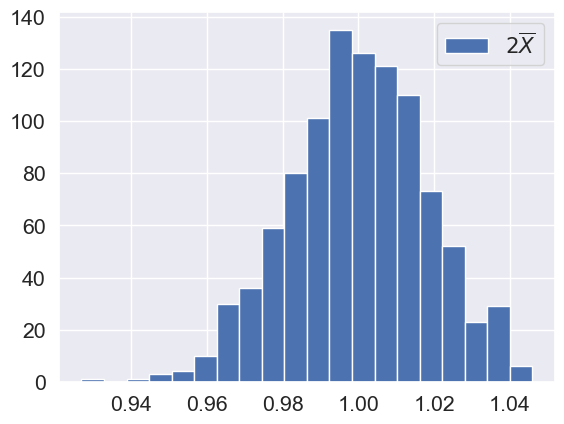

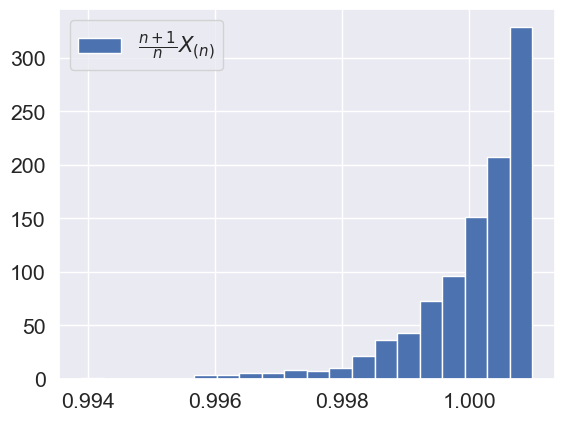

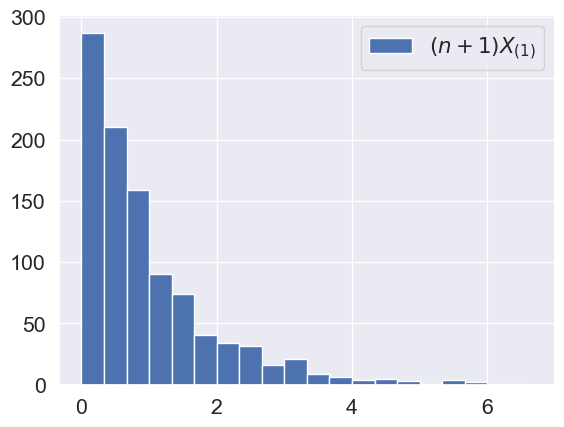

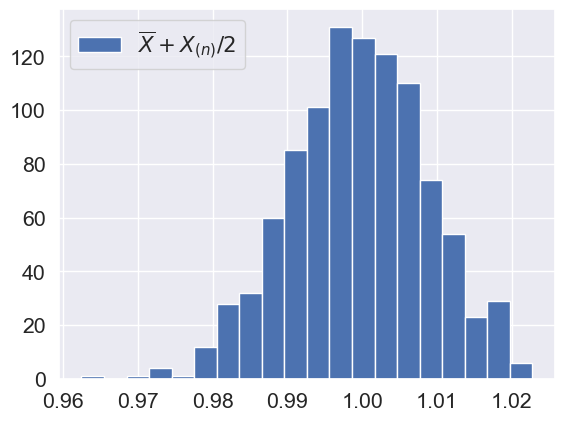

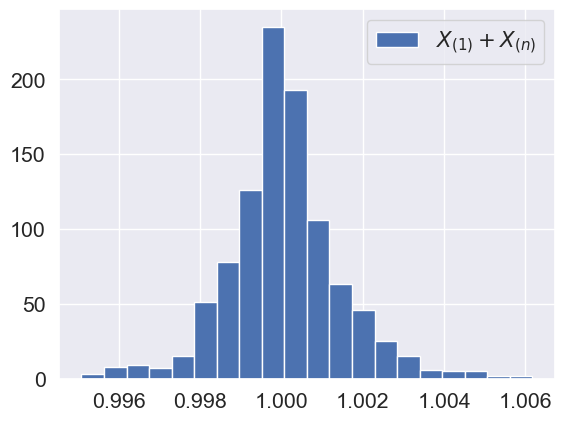

In [326]:
estims = [estim1, estim2, estim3, estim4, estim5]
labels = [r"$2\overline{X}$", r"$\frac{n+1}{n} X_{(n)}$", r"$(n+1)X_{(1)}$", r"$\overline{X} + X_{(n)}/ 2$", r"$X_{(1)}+X_{(n)}$"]
for i in np.arange(5):
    plt.hist(estims[i], label = labels[i], bins = 20)
    plt.legend()
    plt.show()


Изобразим 3 оценки, которые по графику ближе всего находятся к $\theta$:

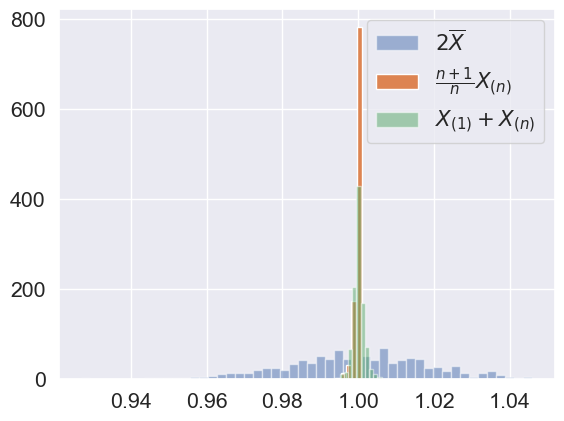

In [327]:
plt.hist(estims[0], label = labels[0], bins =50, alpha = 0.5)
plt.legend()
plt.hist(estims[1], label = labels[1], bins =5, alpha = 1)
plt.legend()
plt.hist(estims[4], label = labels[4], bins = 10, alpha = 0.5)
plt.legend()

По графикам видно, что оценка $\frac{n+1}{n} X_{(n)}$ отклоняется от $\theta$ меньше всего. Теоретически эта оценка также лучше всех остальных в равномерном подходе.

Вспомните свой вывод из задачи 1. Согласуется ли выбор "лучшей" оценки с понятием квадратичного риска? Почему?

В прошлой задаче я выбрал оценку 4, так как она была лучшей(с лучшей дисперсией) среди всех асимптотически-нормальных оценок, а оценка 5 не была асимптотически-нормальной. Если же сравнивать оценки в равномерном подходе, не беря в расчет асимптотическую нормальность, то лучшей будет 5 оценка.

Вспомните и напишите формулировку теоремы Рао-Крамера. Посчитайте, какую нижнюю оценку риска предлагает эта теорема. Сравните её численное значение с посчитанным Вами риском. Сделайте выводы.

Ответ: Рассмотрим выборку для парметрической модели, на которую наложены условия регулярности. Пусть $\theta^*$ - несмещенная оценка $\tau (\theta)$. Тогда для любого $\theta \in \Theta$: <br>
$D_{\theta}\theta^* \geq \frac{(\tau'(\theta))^2}{ni(\theta)}$ <br>
Посчитаем вклад элемента выборки <br>
$u_{\theta}(x) = \frac{\partial ln(1/\theta)}{\partial \theta} = -\frac{1}{\theta}$ <br>
$i(\theta) = E_{\theta}(-\frac{1}{\theta})^2 = \frac{1}{\theta^2}$ <br>
Тогда нижняя оценка риска будет $\frac{\theta^2}{n}$. <br>
Тогда нижняя оценка $\frac{1}{1000}$. Для оценок $2\overline{X}$ и $\frac{n+1}{n} X_{(n)}$ нижняя оценка не выполняется, так как там риски получаются 0,0003 и 10e-7, а это очевидно меньше 0,001. Это связано с тем, что для параметрического семейства равномерных распределений не выполняются условия регулярности, а именно функция правдоподобия не везде дифференцируема по $\theta$. 

Численно посчитайте риск для функции потерь $l(x, y) = |x - y|$ и для какой-то другой осмысленной предложенной Вами функцией потерь. Будет ли порядок качества на оценках таким же, как и для квадратичного подхода?

In [328]:
emp_risk_func1 = np.mean(np.abs((estim1 - theta)))
emp_risk_func2 = np.mean(np.abs((estim2 - theta)))
emp_risk_func3 = np.mean(np.abs((estim3 - theta)))
emp_risk_func4 = np.mean(np.abs((estim4 - theta)))
emp_risk_func5 = np.mean(np.abs((estim5 - theta)))
print("Численные функции риска: {} {} {} {} {}".format(emp_risk_func1, emp_risk_func2, emp_risk_func3,emp_risk_func4,emp_risk_func5))

Численные функции риска: 0.014502438757491642 0.0007103155008436997 0.7502075281754754 0.007307687213802877 0.0010029773164808606


Видно, что порядок качества оценок не изменился, то есть оценка, которая была лучше другой осталась также лучше.

Вернёмся к вадратичной функции потерь. Пусть теперь сам параметр $\theta$ приходит из распределения $\mathsf Q$ с плотностью $q(x) = xI[0, 1]$. Посчитайте численно байесовский риск каждой оценки. Сравните оценки в байесовском подходе. Остался ли порядок прежним?

Подберите такую плотность на $\theta$, при котором порядок сравнения может измениться или объясните, почему это невозможно. Если Вы подобрали плотности, приведите пример постановки задачи, при которой Ваша плотность имеет практический смысл.

*Указание:* не пытайтесь обогнать оценку-максимум по качеству, но может другие две оценки можно заставить сравниваться по-разному для разных плотностей.

Сделайте вывод о сравнении оценок и теореме Рао-Крамера

В этой задаче мы убедились в том, что условие регулярности в теореме Рао-Крамера действительно важно. Также с помощью сравнения оценок с равномерном подходе мы не только наглядно(по графику как мы делали в предыдущей домашке), но и практически показали какая оценка лучшая, среди данных.

## Задача 2

Имперские банки каждую ночь подсчитывают баланс ресурсов Ордалии по сравнению с вчерашней ночью. За день приходят как новые ресурсы, так и потребляются уже имеющиеся. Как и у любого другого банка, если обозначить $X^1$ – максимальное значение баланса за день, $X^2$ – значение баланса в полночь, то $X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ –
параметр формы. В файле Weibull.csv находятся соответствующие измерения.

Наша задача состоит в том, чтобы оценить параметр формы.

Формальное условие: для распределения Вейбулла, функция распределения которого предложена выше, предлагается найти оценку параметра $\gamma$.

In [329]:
weibull_sample = np.loadtxt("Weibull.csv")

1. Постройте гистограмму выборки. Не забудьте подобрать `xlim`, `ylim` и параметр `bins`, чтобы гистограмма была информативна.

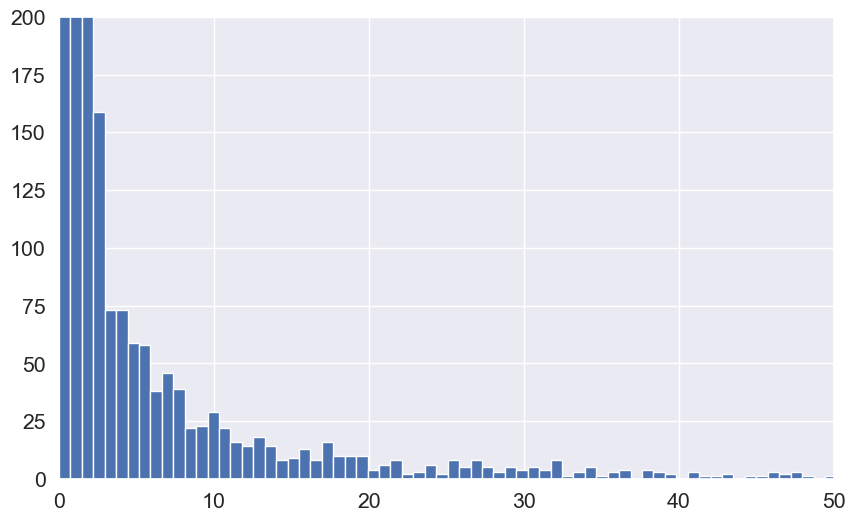

In [330]:
plt.figure(figsize=(10, 6))
plt.hist(x=weibull_sample, bins=500)
plt.xlim(0, 50)
plt.ylim(0, 200)
plt.show()

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$


Однако здесь мы сталкиваемся с проблемой: в нашей выборке есть нули. А логарифм нуля, как известно, не определен. Мы предлагаем вам придумать решение этой проблемы и обосновать его применимость. Ситуация, когда статистическая модель не описывает какие-то артефакты в данных (как, например, нули в этой задаче) для практики типична, и с ней приходится что-то делать.

Ответьте на два вопроса:

а. Могут ли нули появляться если честно семплировать из распределения Вейбулла?

б. Зная плотность распределения и то, что компьютерная точность неабсолютна, откуда нули всё-таки взялись, учитывая то, что авторы задания сэмплировали выборку из распределения Вейбулла?

Ответ: a. Если честно семплировать, то нулей быть не должно, так как распределение непрерывное и $F(x)=0$ для $x = 0$, то есть вероятность того, что будет что-то не больше 0 равна 0, а значит уж тем более 0 быть не должно. Также если рассматривать способ получения выборки, зная ее функцию распределения, а именно когда мы генерируем равномерное на [0,1] распределение и затем применяем к нему обратную, то нулей тоже быть не должно, так как ноль может получится только если мы в равномерной выборке получили 0. <br>
б. Много нулей могло получится из-за ограниченности типа float, например при возведении в степень числа близкого к 0 получился 0 или при логарифмировании числа близкого к 1 получился 0. <br>
Чтобы избавиться от нулей можно попробовать их всех заменить на какую-нибудь очень маленькую константу. Также можно попробовать просто удалить все нули.

2. Посчитайте эмпирическую функцию распределения и
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки.

In [331]:
from statsmodels.distributions.empirical_distribution import ECDF
non_zero_sample1 = weibull_sample.copy()
non_zero_sample1[non_zero_sample1 == 0] = 0.0001
non_zero_sample2 = weibull_sample[weibull_sample > 0]
ecdf1 = ECDF(non_zero_sample1)
ecdf2 = ECDF(non_zero_sample2)
ecdf1_points = ecdf1(non_zero_sample1)
ecdf2_points = ecdf2(non_zero_sample2)
x1 = np.log(non_zero_sample1[ecdf1_points != 1])
x2 = np.log(non_zero_sample2[ecdf2_points != 1])
y1 = np.log(-np.log(1-ecdf1_points[ecdf1_points != 1]))
y2 = np.log(-np.log(1-ecdf2_points[ecdf2_points != 1]))


**Постройте** график (`plt.scatter`) от (y', x') для Ваших способов борьбы с нулями разными цветами.
Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла.

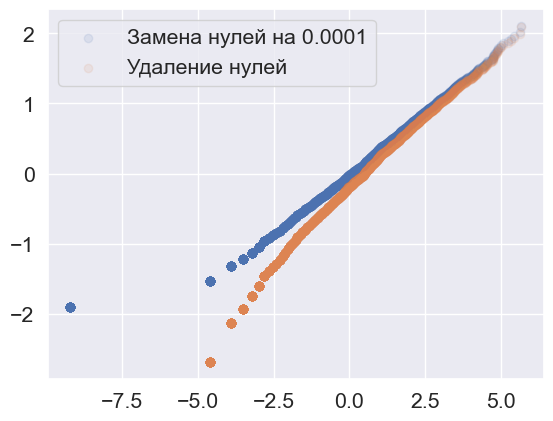

In [332]:
plt.scatter(x1, y1, alpha=0.1, label='Замена нулей на 0.0001')
plt.scatter(x2, y2, alpha=0.1, label='Удаление нулей')
plt.legend()
plt.show()

Сделайте вывод. Какой способ вам кажется более правильным и почему?

**Вывод:**

Мне кажется более правильным способ замены 0 на маленькую константу, так как если мы удаляем все нули из выборки, то это меняет наше распределение, так как мы удаляем все маленькие значения из распределения(те значения, которые считаются равным 0 из-за ограниченности float, но на самом деле нет). А если же мы просто их меняем на достаточно малую константу, то у нас все еще остаются маленькие значения в распределении. Также по графику видно, что при замене нулей у нас прямая линия, а при удалении она кривая сначала и только потом выпрямляется.

3. Оцените параметр формы методом максимального правдоподобия
* по
первым 4 годам;
* по всей выборке.

Мы предполагаем, что Вы будете производить максимизацию по сетке --- для некоторого множества возможных параметров постройте сетку с некоторым шагом (для определённости возьмите шаг равный $10^{-3}$) и выберите лучший параметр на этой сетке. Известно, что $\log_{10}\gamma \in [-2, 2].$

Однако, если Вы хорошо поняли курс оптимизации, то можете написать оптимизатор, который находит максимум сам. Задачу можно переформулировать, чтобы ответ не изменился, а оптимизация шла быстрее. За хорошо сформулированную оптимизационную задачу и реализацию мы добавим 5 бонусных баллов.

Решение:

In [333]:
gammas = np.arange(0.01, 100, 0.001)

def loglikelihood(X, gamma):
    return np.sum(np.log(gamma * X**(gamma-1)*np.exp(-X**gamma)))

max_loglikelihood = loglikelihood(non_zero_sample1, 0.01)
max_gamma = 0.01
for gamma in gammas:
    a = loglikelihood(non_zero_sample1, gamma)
    if(max_loglikelihood < a):
        max_loglikelihood = a
        max_gamma = gamma
print("Лучший параметр формы:{} ".format(max_gamma))

C:\Users\pinma\AppData\Local\Temp\ipykernel_11072\1910443862.py:4: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(gamma * X**(gamma-1)*np.exp(-X**gamma)))


Лучший параметр формы:0.34499999999999975 


Найдите в библиотеке `scipy.stats` класс, отвечающий за данное семейство распределений (будьте аккуратны, внимательно читайте документацию!), и изучите его метод `fit`. Как он находит оценку параметра? Примените эту функцию к нашим данным и сравните полученные результаты с результатами выше.

*Замечание.* Обратите внимание, для чего именно сей метод находит оценку? Сделайте так, чтобы он возвращал оценку непосредственно для интересующего нас параметра.

In [335]:
gamma_estim = sps.weibull_min.fit(weibull_sample, floc=0, fscale=1)[0]
print(gamma_estim)

0.4102254059906964


4. Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$) для того метода, который вам кажется более правильным. Хорошо ли линии соответствуют выборке? Как вы думаете, почему?

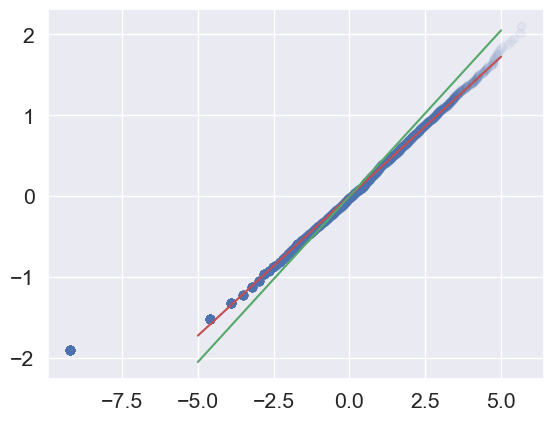

In [339]:
x_point = np.linspace(-5, 5, 1000)
plt.plot(x_point, max_gamma * x_point, c = 'r')
plt.plot(x_point, gamma_estim * x_point, c = 'g')
plt.scatter(x1, y1, alpha=0.05, label='Замена нулей на 0.0001')

Видно на графике, что почти все точки лежат на прямой. Это значит, что хорошо подобрали параметр гамма

**Вывод** в задаче мы рассмотрели, как можно бороться с проблемой большого количества нулей в выборке на примере выборки Вейбулла и какой способ борьбы будет подходить лучше. Также мы нашли лучший параметр гамма с помощью прохода по сетке параметров и на графике проверили, что действительно хорошо подобрали параметр.

## Задача 3

Хорошим методом получения аналитических оценок является метод моментов.

1. Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**, см. [Википедию](https://en.wikipedia.org/wiki/Gamma_distribution)), $\theta = 3$ для всех распределений $(N = 1000).$ Посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Промоделируйте полученные оценки для разных размеров выборки $n < N$ и изучите их скорости сходимости. На графике отразите истинный параметр. Можете построить отдельный график модуля/квадрата разности оценки и параметра (риск) для какой-то выборке и посмотреть, как быстро риск сходится к нулю.

Будем для каждого распределение сначала моделировать сходимость оценки к параметру, а потом на графике изображать функцию потерь с ростом длины выборки.

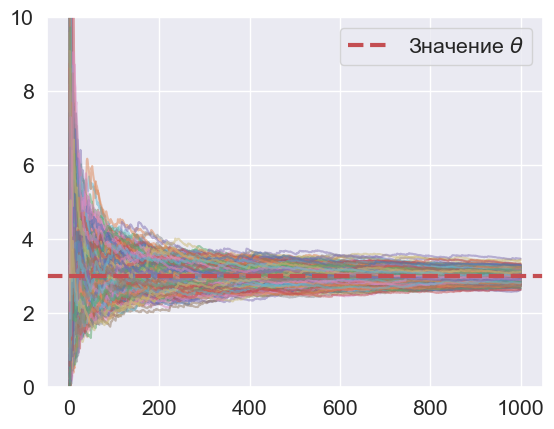

In [289]:
theta = 3
N = 1000
normal_sample = sps.norm.rvs(0, np.sqrt(theta), size=(N,N))
estim = np.cumsum(normal_sample**2, axis=1)/(np.arange(1,N+1))
for i in np.arange(0, N):
    plt.plot(np.arange(1, N+1),estim[i], alpha=0.5)
    plt.ylim(0, 10)
plt.axhline(y=theta,  linestyle='--', label=r'Значение $\theta$', linewidth =3, c='r')
plt.legend()
plt.show()

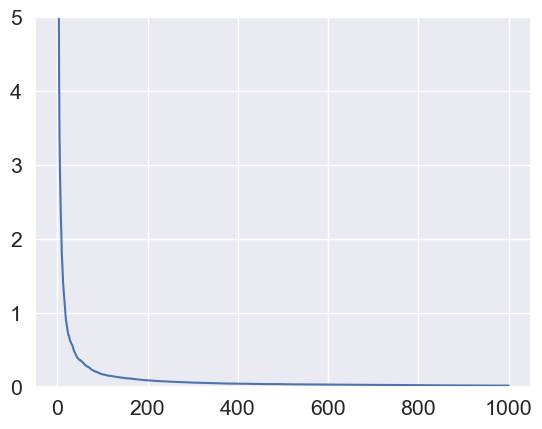

In [290]:
risk = np.mean((estim-theta)**2,axis=0)
plt.plot(np.arange(1, N+1),risk)
plt.ylim(0,5)
plt.title("Функция потерь")
plt.show()

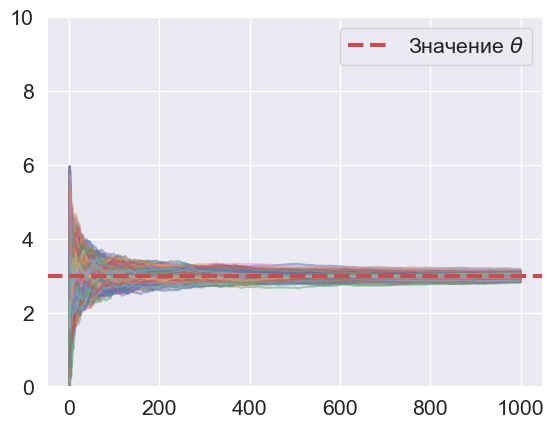

In [291]:
uniform_sample = sps.uniform.rvs(0, theta, size=(N,N))
estim = 2 * np.cumsum(uniform_sample, axis=1)/(np.arange(1,N+1))
for i in np.arange(0, N):
    plt.plot(np.arange(1, N+1),estim[i], alpha=0.5)
    plt.ylim(0, 10)
plt.axhline(y=theta,  linestyle='--', label=r'Значение $\theta$', linewidth =3, c='r')
plt.legend()
plt.show()

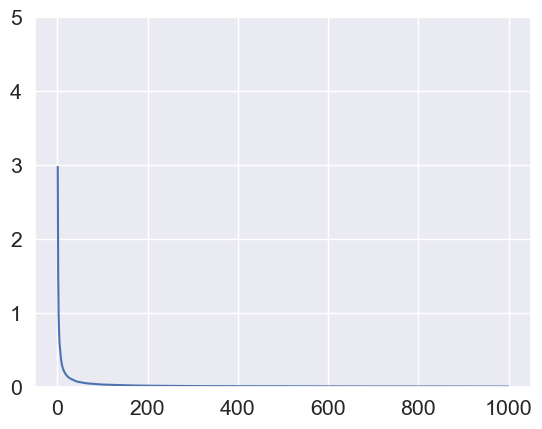

In [292]:
risk = np.mean((estim-theta)**2,axis=0)
plt.plot(np.arange(1, N+1),risk)
plt.ylim(0,5)
plt.title("Функция потерь")
plt.show()

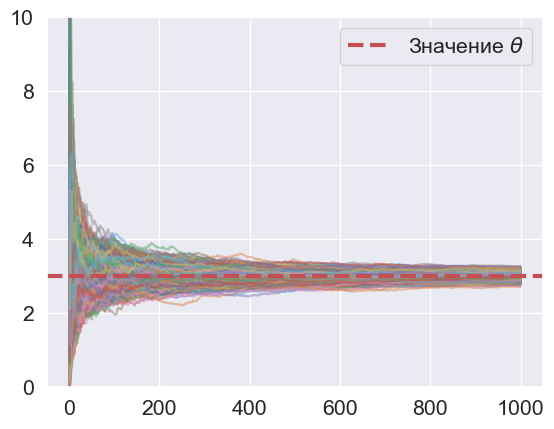

In [293]:
expon_sample = sps.gamma.rvs(a=1,scale = theta, size=(N,N))
estim = (np.cumsum(expon_sample, axis=1)/(np.arange(1,N+1)))
for i in np.arange(0, N):
    plt.plot(np.arange(1, N+1),estim[i], alpha=0.5)
    plt.ylim(0, 10)
plt.axhline(y=theta,  linestyle='--', label=r'Значение $\theta$', linewidth =3, c='r')
plt.legend()
plt.show()

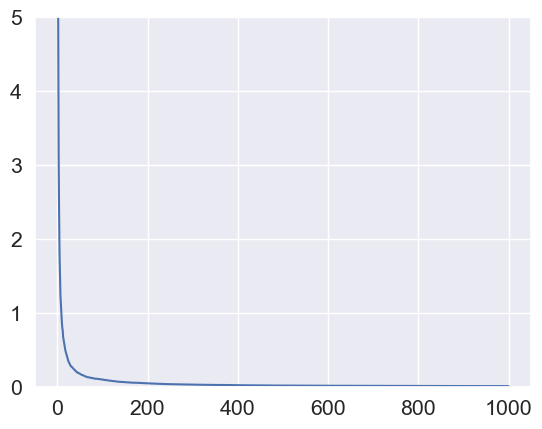

In [294]:
risk = np.mean((estim-theta)**2,axis=0)
plt.plot(np.arange(1, N+1),risk)
plt.ylim(0,5)
plt.title("Функция потерь")
plt.show()

Решение (вывод метода моментов для каждого случая):

Посчитаем для нормального распределения оценку методом моментов:<br>
$\overline{X^2} =EX^2 = a^2+\sigma^2 = 0+\theta$<br>
$\theta = \overline{X^2}$ <br>
Для равномерного:<br>
$\overline{X} = \theta/2$ <br>
$\theta= 2 \overline{X}$ <br>
Для гамма: <br>
$\overline{X} = k\theta = \theta$ <br>
$\theta = \overline{X}$ 

2. Есть два замечательных распределения, которые игнорировать никак нельзя. Первое --- $Pareto(k)$ с плотностью $p(x) = kx^{-k-1} I( x \ge 1)$, где $k > 0$. Второе --- $Cauchy(0, \theta)$  с плотностью $p(x) = \frac{\theta}{x^2 + \theta^2}$. Запишите оценки методом моментов для них и проверьте их на состоятельность на практике. Для моделирования возьмите то же значение параметра, что дано выше.

*Подсказка:* внимательно изучите, чему равны моменты каждого из распределений и при каких условиях. Можно ли гарантировать состоятельность полученных оценок каким-то теоретическими фактами?

Можно гарантировать состоятельность оценок с помощью следующей теоремы: <br>
Если $m: \Theta -> m(\Theta)$ - функция, которую мы получаем записывая метод моментов - биекция и $m^-1$ можно доопределить до функции заданной на всем множестве $R^k$ непрерывной в каждой точке $m(\Theta)$, то оценка полученная методом моментов сильно состоятельная

Решение (аналитический вывод оценок):

Пусть $X\sim Pareto(k)$. Докажем, что $ln(X)~Exp(k)$: <br>
$F_{ln(X)}(x) = P(ln(X) \leq x) = P(X \leq e^x) = F_X(e^x) = (1-e^{-kx})I(x \geq 0)$ - экспоненциальное распределение <br>
Тогда можно посчитать $ElnX$ и с помощью метода моментов оценить k: <br>
$ElnX = \overline{lnX}$ <br>
$\frac{1}{k} = \overline{lnX}$<br>
$k = \frac{1}{\overline{lnX}}$ <br>
Теперь оценим $\theta$ для распределения Коши. Для этого рассмотрим чему равно $E\frac{1}{1+X^2}$, где $X\sim Cauchy(0, \theta)$ <br>
$E\frac{1}{1+X^2} = \int_{-\infty}^{+\infty} \frac{\theta}{\pi(1+x^2)(\theta^2+x^2)}dx = \frac{\theta}{\pi(\theta^2-1)}\int_{-\infty}^{+\infty}(\frac{1}{1+x^2}-\frac{1}{\theta^2+x^2})dx =  \frac{\theta}{\pi(\theta^2-1)}(\pi - \frac{\pi}{\theta}) = \frac{1}{1+\theta}$ <br>
Тогда методом моментов получаем: <br>
$\overline{\frac{1}{1+X^2}} = \frac{1}{1+\theta}$ <br>
$\theta = \frac{1}{\overline{\frac{1}{1+X^2}}} - 1$ <br>
Эти 2 оценки сильно состоятельные, не трудно в этом убедится проверив, так как функции $\frac{1}{k}$ и $\frac{1}{1+\theta}$, на соответствующих им множествах $\Theta$ непрерывные биекции.

Моделирование:

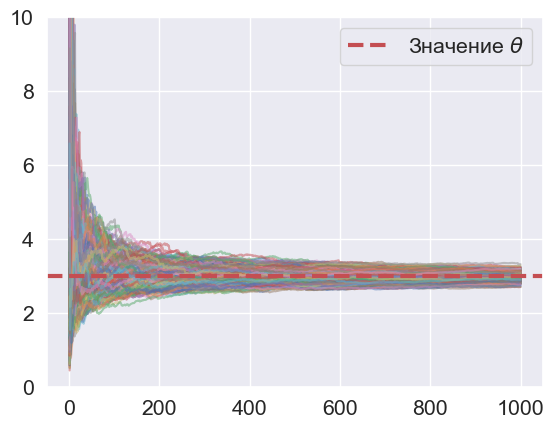

In [296]:
pareto_sample = sps.pareto.rvs(b=theta, size=(N,N))
estim = 1/(np.cumsum(np.log(pareto_sample), axis=1)/(np.arange(1,N+1)))
for i in np.arange(0, N):
    plt.plot(np.arange(1, N+1),estim[i], alpha=0.5)
    plt.ylim(0, 10)
plt.axhline(y=theta,  linestyle='--', label=r'Значение $\theta$', linewidth =3, c='r')
plt.legend()
plt.show()

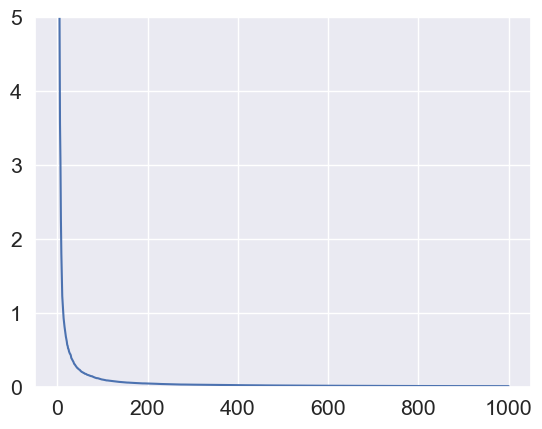

In [297]:
risk = np.mean((estim-theta)**2,axis=0)
plt.plot(np.arange(1, N+1),risk)
plt.ylim(0,5)
plt.title("Функция потерь")
plt.show()

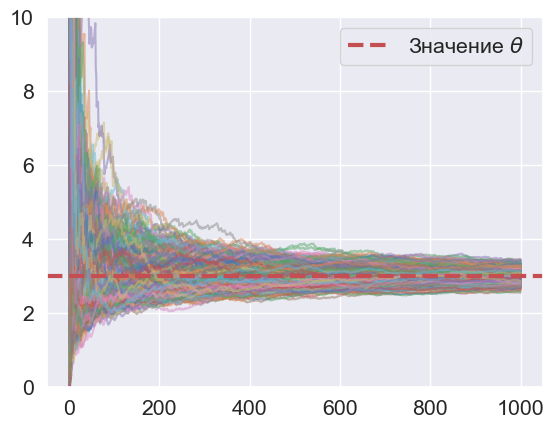

In [298]:
cauchy_sample = sps.cauchy.rvs(scale=theta, size=(N,N))
estim = 1/(np.cumsum(1/(1+(cauchy_sample)**2), axis=1)/(np.arange(1,N+1))) - 1
for i in np.arange(0, N):
    plt.plot(np.arange(1, N+1),estim[i], alpha=0.5)
    plt.ylim(0, 10)
plt.axhline(y=theta,  linestyle='--', label=r'Значение $\theta$', linewidth =3, c='r')
plt.legend()
plt.show()

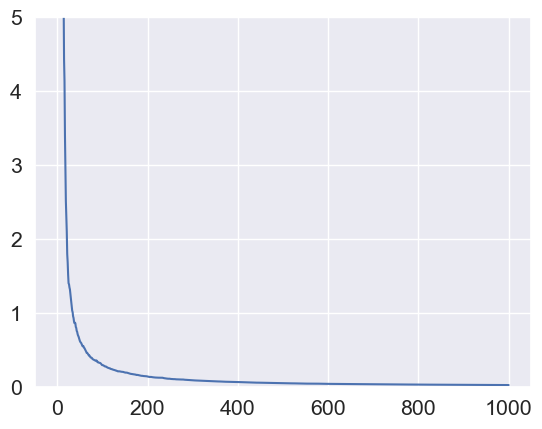

In [299]:
risk = np.mean((estim-theta)**2,axis=0)
plt.plot(np.arange(1, N+1),risk)
plt.ylim(0,5)
plt.title("Функция потерь")
plt.show()

**Вывод:** в этой задаче мы проверили на практике, полученные нами теоретические результаты про состоятельность оценок, полученных методом моментов. Также мы на графиках функции риска посмотрели примерные скорости сходимости этих оценок.

**Следующие две задачи посвящены тому, как получать более информативные оценки, чем точечные. Нам приходится обращаться к ним, так как свойства точечных оценок являются предельными, и мы мало что знаем о том, насколько конкретное значение оценки близко к истинному значению параметра. В условиях кровавой войны информация должна быть максимальной.**

### Задача 4. Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка) и какой-то отрезок, в который параметр попадёт с высокой вероятностью (такой отрезок называется **доверительным интервалом**_. На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Вспомним, как работает **метод подстановки** для получения оценок. В нём мы выражаем параметр при помощи распределения (как среднее или медиана, например), потом меняем распределение на эмпирическое и выражаем параметр уже через него. Бутстреп это подмена истинного распределения на эмпирическое.



1. Для каждого распределения из задачи 3 (в том числе из пункта 2) сгенерируйте выборку размера $N = 1000$. Далее замените Ваше распределение на равномерное распределение по построенной выборке (по теореме Гливенко-Кантелли эти распределения достаточно близки), и из эмпирического (равномерного) распределения постройте 100 выборок. Опишите, как Вы будете это делать.

*Указание:* из истинного распределения (нормального и т.д.) новые данные генерировать **нельзя**. Бутстреп это способ получения псевдо-новых данных из уже имеющихся.

Сначала мы сгенерируем выборку размера 1000. Далее из нее будем равновероятно выбирать 1000 элементов, чтобы сгенерировать еще выборку. И таким образом мы сгенерируем 100 выборок. 

Ответ:

In [305]:
N = 1000
normal_sample = sps.norm.rvs(scale=np.sqrt(theta),size=N)
uniform_sample = sps.uniform.rvs(scale=theta, size=N)
gamma_sample = sps.gamma.rvs(a=1, scale=theta, size=N)
pareto_sample = sps.pareto.rvs(b=theta, size=N)
cauchy_sample = sps.cauchy.rvs(scale=theta, size=N)

Сгенерируем из нашей выборки еще 100 выборок по алгоритму написанному выше:

In [306]:
size = (100, N)
normal_samples = np.random.choice(normal_sample, replace=True, size = size)
uniform_samples = np.random.choice(uniform_sample, replace=True, size = size)
gamma_samples = np.random.choice(gamma_sample, replace=True, size = size)
pareto_samples = np.random.choice(pareto_sample, replace=True, size = size)
cauchy_samples = np.random.choice(cauchy_sample, replace=True, size = size)

2. Для каждой псевдо-выборки из предыдущего пункта постройте оценку методом моментов из задачи 3: получится выборка оценок (как в домашке 1). По ней посчитайте эмпирическую (выборочную) дисперсию оценок и сделайте вывод о том, как связано значение дисперсии оценки (эмпирической и бутстрепной) с точностью и скоростью сходимости оценки к параметру.

In [308]:
norm_estim = np.sum(normal_samples **2, axis=1) / N
uniform_estim = 2 * np.sum(uniform_samples, axis=1) / N
gamma_estim = np.sum(gamma_samples, axis=1) / N
pareto_estim = 1 / (np.sum(np.log(pareto_samples), axis=1) / N)
cauchy_estim = 1/(np.sum(1/(1+(cauchy_samples)**2), axis=1)/N) - 1
norm_var = np.var(norm_estim)
uniform_var = np.var(uniform_estim)
gamma_var = np.var(gamma_estim)
pareto_var = np.var(pareto_estim)
cauchy_var = np.var(cauchy_estim)
print(norm_var, uniform_var, gamma_var, pareto_var, cauchy_var)

0.013498006769592513 0.0034952377528656526 0.01052926038335243 0.009435122537796752 0.027911591408538286


Видно, что дисперсии достаточно маленькие, а дисперсия это как известно на сколько в среднем случайная величина отклоняется от среднего,то есть в случае несмещенных оценок это будет то насколько оценка отклоняется от параметра. Поэтому в случае несмещенности, если эмпирическая или бутстрепная дисперсия сходится к 0 это говорит о скорости сходимости оценки к параметру.

3. Как мы знаем, оценка методом моментов не гарантирует несмещённости. При помощи метода бутстрапирования найдите смещение (разницу между мат. ожиданием оценки и значением параметра) каждой оценки. Какие оценки (в теории) несмещённые?

In [309]:
normal_bias = np.abs(np.mean(norm_estim) - theta)
uniform_bias = np.abs(np.mean(uniform_estim) - theta)
gamma_bias = np.abs(np.mean(gamma_estim) - theta)
pareto_bias = np.abs(np.mean(pareto_estim) - theta)
cauchy_bias = np.abs(np.mean(cauchy_estim) - theta)
print(normal_bias, uniform_bias, gamma_bias, pareto_bias, cauchy_bias)

0.007815242623768093 0.09370593874148758 0.13586800243185237 0.07875805783736034 0.25855294078485613


Видно, что разность среднего значения оценок и параметра достаточно низкая. В теории же легко понять, что оценки 1-4 несмещенные(по определению), для оценки параметра Коши сложно теоретически посчитать ее матожидание, чтобы понять несмщенная она или нет.

**Вывод:**

Мы воспользовались бутстрепом для того, чтобы имея только 1 выборку сделать оценку на параметр, сгенерировав еще много псевдовыборок и получили численно, что бутстрепные оценки имеют достаточно хорошую дисперсию. Можно сделать вывод, что бутстреп является достаточно хорошим методом для оценивания параметра.

### Задача 5. Байес.

**Эта задача является бонусной и стоит 30 (!!!) баллов**

Байесовское оценивание даёт ультиматимативный способ построения оценок без какой-либо потери в информации. Теперь мы оцениваем параметры распределения не точками и не отрезками, а распределениями!

1. Будем смотреть на параметрическое семейство распределений как на условное распределение: $P_{\theta} = P(X | \theta)$. В байесовском подходе подразумевается, что параметр $\theta$ сам приходит из некоторого **априорного** распределения (которое статист либо предпологает сам, либо предпологает исходя из внешних знаний об области).

Вспомним теорему Байеса: $p(\theta | X) = \frac{p(X | \theta) p(\theta)}{p(X)}$, где знаменатель $p(x)$ получается как интеграл по $\theta$ от числителя. В зависимости от того, можем ли мы взять этот интеграл, выбирается тип байесовской оценки. $p(X | \theta)$ мы знаем, это хорошо нам знакомое правдоподобие, $p(\theta)$ называется априорным распределением (prior) параметра, мы его выбираем сами исходя из наших предпочтений, $p(X)$ от параметра не зависит и называется обоснованностью (evidence), и показывает, насколько правдоподобна выборка в терминах выбранного семейства распределений.

Скачайте датасет сердечных заболеваний: https://colab.research.google.com/drive/1J5ujdgEDwLhie13d4XDd3manrNe_c3Ek#scrollTo=vd8WgXL3jjzL

Мы будем предсказывать наличие и степень выраженности болезни (переменная num) это наличие, используя следующие параметры: age, sex, fbs, chol

Переменная num имеет категориальное распределение. Напишите его плотность и докажите, что сопряжённым к нему будет распределение Дирихле https://en.wikipedia.org/wiki/Dirichlet_distribution.

Доказательство:

Пока что мы работаем в модели, которая не учитывает никаких параметров и рассматриваем весь датасет как единую выборку индикаторов степени выраженности болезни (num).

2. "Байес для бедных" (Poor man's bayes)

Пусть интеграл в знаменателе мы считать не умеем и мы готовы с этим смириться. Что в таком случае делать? Можно искать моду (максимум) апостериорной плотности $P(\theta | X)$, где $X$ --- выборка, и рассматривать оценку $\theta$ как точку максимума.

Подберите три различных априорных распределения на параметр (т.е. три разных набора параметров априорного распределения Дирихле) и найдите максимум апостериорной плотности.
Преобразуйте задачу максимизации и найдите максимум по сетке или оптимизатором.

Сделайте вывод о том, как влияет априорная информация о параметре на оценку? Вспомните лекции из курса машинного обучения. На какой объект похоже априорное распределение? Как его следует выбирать. Как связаны максимум апостериорной плотности и оценка максимального правоподобия?

Ответ:

Вы --- врач и оценка вероятности $\mathsf P(num=0)$ оказывается больше, чем 0.3, то Вы отправите пациента на доп. обследование и возможно на лечение. Как лучше подобрать априорное распределение, чтобы оценке байеса для бедных можно было доверять. Почему вообще одни априорные параметры могут быть лучше других?

Ответ:

Подберите такой порог $P(num = 0)$ при котором пациент отправляется на доп. обследование и два таких набора априорных параметров, при которых для данной выборки порог достигается и не достигается.

Сделайте вывод о выборе априорного распределения.

3. Байес для богатых (обычный байес).

Отказываться считать интеграл нельзя, за это полагается смертная казнь.

Посчитайте и визуализируйте апостериорные плотности для разных априорных параметров. Если плотность оказывается слишком похожа на дельта-функцию, считайте её не для всей выборки

Что Вы бы брали точечной оценкой параметра исходя из апостериорного распределения? Почему?

4. Выбор модели.

Рассмотрим несколько моделей предсказания сердечных заболеваний. Модели будут очень простыми --- у нас будет разный параметр вероятности для разных групп пациентов. Предложите 4-5 разбиений пациентов на группы (по полу/возрасту/каким-то порогам на количество сахара или холестерина в крови) и рассмотрите модели, при которых параметры категориального распределения оказываются разными или одинаковыми для разных групп. Посмотрите на пример с семинара. Посчитайте обоснованность в каждом случае.

**Указание:** не считайте интеграл, так как обоснованностью будет произведение комбинаторных коэффициентов и бета-функций.

**Указание:** При сравнении обоснованности для модели, которая учитывает разбиение на группы с той, которая не учитывает, плотность всё равно следует факторизовать на группы, чтобы анализ был одинаковым.

Например, для сравнения модели "параметр зависит от возраста" и "параметр зависит от пола" необходимо разделить данные на 4 группы "молодые/старые мужчины/женщины". См. пример с семинара.

Предполагая возможнность модели "параметр зависит от пола" мы делаем неявное предположение, что данные для разных полов приходят из разных совокупностей, а значит их нельзя объединять в одну выборку. Осторожно формулируйте, в каких предположениях Вы сравниваете модели.

У какой модели выше обоснованность? Почему?

Сделайте вывод о байесовском оценивании: